# Transformation Digitale

Le but de ce projet est d'accompagner le marchand de vins de renom dans sa ***transformation digitale*** afin que ces ventes sur Internet soient prises en compte et surtout de valoriser ce marché du numérique qui offre plusieurs opportunités.

Mon rôle étant que Data Scientist est de l'aider à bâtir des outils nécessaires pour l'analyse de ces ventes sur Internet qui, jusques là étaient impossibles d'analyser pour manque de rapprochement entre les exports des tables de ventes sur Internet et ceux fait hors ligne.

![caviste](https://www.espacemarconi.fr/wp-content/uploads/2019/04/espace-marconi-459-1080x675.jpg)

# Table de matières

# 1. Définition du problème

- L'objectif ici est de prédire le `prix` de vin en fonction des variables `quantitives`. Ensuite, construire les `profils de vins` autour de et de décrire les cluster obenus

- Nous avons à notre portée plusieurs jeux de données, notamment sur les réferences des produits en boutique et celles en lignes.

- Nous commenceront de rien pour construire au fur et à mesure une solution satisfaisante ayant de bonnes performances.

- Il s'agit d'unn problème de `Machine Learning` et plus précisement d'une `régression` pour le premier cas qui est la prédiction du prix de vins et d'un deuxième cas d'une `classification` pour la construction des profils de vins.

- Nous évaluerons le moddèle du premier cas en utilisant le métrique `R2` et pour le sécond cas le `Score F1` pour ensuire voir d'autres métriques comme `l'accuracy`.

# 2. Importation des librairies et acquisition des données

## 2.1. Importation des librairies

In [1]:
# Manipulation des données
import numpy as np
import pandas as pd

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Afficher toutes les colonnes
pd.set_option("display.max_columns", None)

## 2.2. Acquisition des données

In [3]:
# Charger les données
vin_df = pd.read_csv("vin_data.csv")

# Afficher la taille des données
print(f"La base fait : {vin_df.shape[0]} lignes",
      f"et {vin_df.shape[1]} colonnes\n")

# Afficher les 3 premières lignes des données
vin_df.head(3)

La base fait : 896 lignes et 33 colonnes



,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,NaN,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock


# 3. Analyse de la forme

## 3.1 Controle de qualité des données

- Informations sur toutes les données

In [4]:
# Afficher les inforamations des données
vin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_web                 714 non-null    object 
 1   virtual                896 non-null    int64  
 2   downloadable           896 non-null    int64  
 3   rating_count           896 non-null    int64  
 4   average_rating         896 non-null    float64
 5   total_sales            896 non-null    float64
 6   tax_status             896 non-null    object 
 7   tax_class              0 non-null      float64
 8   post_author            896 non-null    float64
 9   post_date              896 non-null    object 
 10  post_date_gmt          896 non-null    object 
 11  post_content           0 non-null      float64
 12  post_title             896 non-null    object 
 13  post_excerpt           896 non-null    object 
 14  post_status            896 non-null    object 
 15  commen

- Vérification des valeurs manquantes

In [5]:
# Afficher le nombre de valeurs manquantes
(vin_df.isna().sum() * 100 / vin_df.shape[0]).sort_values(ascending=False)

post_password            100.0000
tax_class                100.0000
post_content_filtered    100.0000
post_content             100.0000
post_mime_type           100.0000
id_web                    20.3125
comment_count              0.0000
product_id                 0.0000
onsale_web                 0.0000
post_name                  0.0000
menu_order                 0.0000
price                      0.0000
guid                       0.0000
post_parent                0.0000
stock_quantity             0.0000
post_modified_gmt          0.0000
post_modified              0.0000
post_type                  0.0000
ping_status                0.0000
virtual                    0.0000
comment_status             0.0000
post_status                0.0000
post_excerpt               0.0000
post_title                 0.0000
post_date_gmt              0.0000
post_date                  0.0000
post_author                0.0000
tax_status                 0.0000
total_sales                0.0000
average_rating

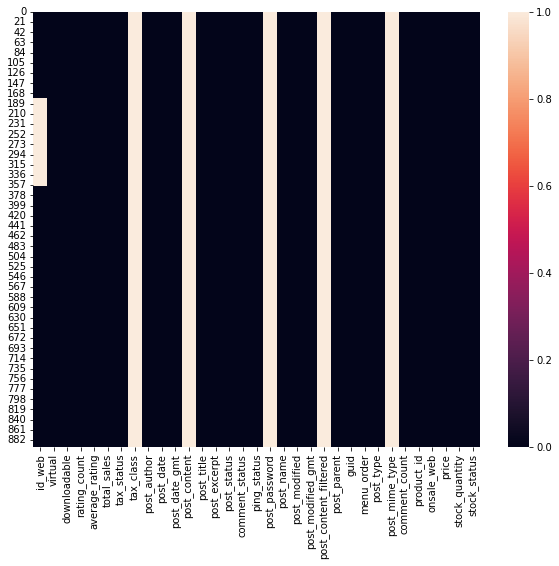

In [6]:
# Visualiser les valeurs manquantes

# Définir l'espace de travail
plt.figure(figsize=(10, 8))
sns.heatmap(vin_df.isna());

- Vérification des valeurs doubles

In [7]:
# Afficher le nombre de doublons
vin_df.duplicated().sum()

0

### - Analyse et identification des `otuliers` (valeurs aberrantes)

- Approche statistique : Méthode du z score et des interquartiles

In [8]:
# Utilisation de la méthode du Z score (supérrieur à 2 standard deviation)

outliers = [] # liste vide prête à accueillir les valeurs aberrantes

# Définir la fonction
def z_score(df):
    
    # Limiter à 2 standard deviation
    LIMITE = 2
    
    # Parcourir les données
    for col in df:
        score = (col - np.mean(df) / np.std(df))
        
        # Vérification
        if np.abs(score) > LIMITE:
            outliers.append(col)
    
    # Renvoyer la liste de valeurs aberrantes potentielles
    return outliers

In [9]:
# Appeler la fonction pour détecter les outliers dans les prix des produits
z_score(vin_df["price"])

[25.0,
 24.2,
 34.3,
 20.8,
 14.1,
 46.0,
 34.3,
 32.7,
 31.2,
 60.0,
 42.6,
 80.0,
 18.3,
 22.8,
 19.3,
 21.8,
 7.7,
 33.7,
 44.3,
 71.6,
 12.7,
 8.7,
 8.7,
 8.7,
 11.9,
 11.9,
 14.5,
 14.4,
 19.5,
 20.8,
 22.0,
 16.6,
 60.0,
 23.4,
 33.2,
 32.0,
 77.8,
 12.7,
 14.7,
 14.05,
 22.9,
 44.0,
 37.0,
 39.0,
 17.0,
 23.2,
 19.0,
 16.4,
 14.4,
 13.7,
 12.6,
 22.8,
 12.8,
 22.1,
 12.8,
 15.8,
 15.8,
 16.3,
 16.3,
 9.7,
 6.8,
 12.6,
 35.0,
 31.7,
 100.0,
 23.0,
 88.4,
 29.8,
 25.7,
 77.4,
 39.0,
 53.0,
 49.0,
 29.5,
 33.0,
 37.5,
 69.0,
 59.0,
 13.7,
 19.2,
 29.0,
 9.8,
 14.5,
 20.35,
 12.0,
 18.5,
 9.3,
 9.3,
 11.6,
 14.3,
 10.8,
 7.6,
 12.0,
 20.5,
 14.3,
 18.2,
 9.0,
 7.8,
 5.7,
 5.7,
 5.7,
 13.5,
 13.5,
 11.5,
 24.0,
 24.0,
 11.9,
 16.7,
 21.4,
 16.6,
 13.3,
 9.5,
 12.1,
 9.3,
 17.8,
 13.5,
 10.8,
 27.2,
 9.4,
 5.8,
 5.8,
 38.0,
 38.0,
 9.9,
 11.3,
 23.0,
 6.7,
 7.6,
 79.8,
 48.5,
 39.8,
 58.8,
 26.5,
 13.4,
 17.1,
 16.7,
 11.6,
 12.8,
 8.9,
 9.7,
 17.2,
 16.9,
 12.6,
 29.9,
 9.6,
 11.1,
 

- Approche Statistique : Méthode des interquartiles

In [10]:
# Définir la fonction 
def detect_outliers(df, ft):
    
    # 1er quartile
    Q1 = df[ft].quantile(0.25)
    # 3ème quartile
    Q3 = df[ft].quantile(0.75)
    
    # Calcul de l'interquartile
    IQR = Q3 - Q1
    
    # Définir les limites
    upper_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    
    # Liste de stockage des indexes de valeurs abérrantes
    indexes = df.index[(df[ft] > upper_limit) | (df[ft] < low_limit)]
    
    # Renvoyer cette liste
    return indexes

In [11]:
# Créer la liste des indexes
index_list = []

# Parcourir toutes les lignes de la colonne prix
for feature in ["price"]:
    index_list.extend(detect_outliers(vin_df, feature))

In [12]:
# Afficher le nombre de valeurs aberrantes
print(f"Nous avons au total : {len(index_list)} potentiels outliers\n")
# Afficher les indexes des potentielles valeurs aberrantes
print(index_list)

Nous avons au total : 40 potentiels outliers

[64, 66, 178, 189, 206, 214, 269, 280, 297, 305, 382, 384, 388, 401, 402, 404, 405, 410, 563, 564, 608, 613, 614, 619, 620, 684, 693, 735, 769, 784, 785, 786, 824, 829, 830, 835, 836, 837, 838, 839]


- Méthode graphique : Nuage de points

In [13]:
# Définir la fonction qui trace l'espace de travail
def fig(width, height):

    # Renvoyer les tailles données
    return plt.figure(figsize=(width, height))

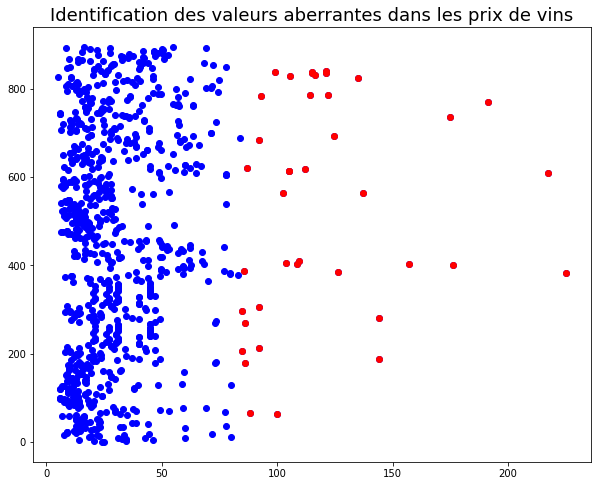

In [14]:
# Calculer les quartiles
Q1 = vin_df['price'].quantile(0.25)
Q3 = vin_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites inférieures et supérieures pour détecter les outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = vin_df[(vin_df['price'] < lower_limit) | (vin_df['price'] > upper_limit)]

# Définir l'espace de travail
fig(10, 8)
# Visualiser les valeurs normales
plt.scatter(vin_df['price'], vin_df.index, color='blue')
# Visualiser les outliers
plt.scatter(outliers['price'], outliers.index, color='red')
# Titrer le graphique
plt.title("Identification des valeurs aberrantes dans les prix de vins", fontsize=18);

- Méthode des boxplots

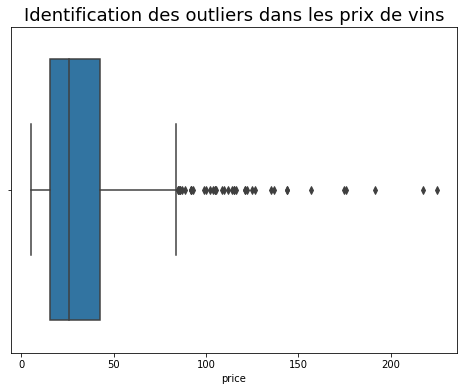

In [15]:
# Définir l'espace de travail
fig(8, 6)
# Visualiser les outliers
sns.boxplot(data=vin_df, x="price")
# Titrer le graphique
plt.title("Identification des outliers dans les prix de vins", fontsize=18);

## 3.2. Gestion de la qualité des données

In [16]:
# Réaficher les valeurs manquantes
(vin_df.isna().sum() * 100 / vin_df.shape[0]).sort_values(ascending=False)

post_password            100.0000
tax_class                100.0000
post_content_filtered    100.0000
post_content             100.0000
post_mime_type           100.0000
id_web                    20.3125
comment_count              0.0000
product_id                 0.0000
onsale_web                 0.0000
post_name                  0.0000
menu_order                 0.0000
price                      0.0000
guid                       0.0000
post_parent                0.0000
stock_quantity             0.0000
post_modified_gmt          0.0000
post_modified              0.0000
post_type                  0.0000
ping_status                0.0000
virtual                    0.0000
comment_status             0.0000
post_status                0.0000
post_excerpt               0.0000
post_title                 0.0000
post_date_gmt              0.0000
post_date                  0.0000
post_author                0.0000
tax_status                 0.0000
total_sales                0.0000
average_rating

- Gestion des valeurs manquantes :

Après analyse faite, nous allons procédér à l'élimination de toutes les colonnes ayant des valeurs manquantes. En effet, ces colonnes ne sont pas non plus utile pour le reste de l'analyse ni pendant la modélisation.

In [17]:
# Afficher la taille des données avant élimination des valeurs manquantes
vin_df.shape

(896, 33)

In [18]:
# Supprimer toutes les valeurs manquantes
vin_df.dropna(axis=1, inplace=True)

In [19]:
# Vérifier la taille des donnés après élimination des valeurs manquantes
vin_df.shape

(896, 27)

In [20]:
# Créer la liste des colonnes à garder selon la connaissance métier
cols_to_keep = ["total_sales", "onsale_web", "price", "stock_quantity", "stock_status"]

# Constituer le nouvel ensemble de données
vin_df = vin_df[cols_to_keep].copy()

In [21]:
# Afficher la taille des nouvelles données
print(f"La base fait : {vin_df.shape[0]} lignes et {vin_df.shape[1]} colonnes\n")
# Afficher les 5 premières lignes des données
vin_df.head()

La base fait : 896 lignes et 5 colonnes



,total_sales,onsale_web,price,stock_quantity,stock_status
0,10.0,1,25.0,0,instock
1,6.0,1,24.2,0,outofstock
2,0.0,1,34.3,0,outofstock
3,0.0,1,20.8,0,outofstock
4,3.0,1,14.1,0,outofstock


# 4. Analyse de fond

## 4.1 Analyse Univariée

In [22]:
# Créer une fonction de traçage des histogrammes
def plot_hist(df, column_name, **kwargs):
    """Cette fonction permet de tracer les histogrammes en fournissant
       le DataFrame, la colonne sur laquelle on trace cette histogramme 
       et nombre de cases qu'il faut prendre en compte

    Args:
        df (DataFrame): C'est le DataFrame qu'il faut donner en entrée
        column_name (string): La colonne sur laquelle on trace l'histogramme
        bins_edge (int): La taille de case de l'histogramme
    """

    # Tracer le graphique histogramme
    plt.hist(x=column_name, data=df, **kwargs)

# Définir la fonction qui trace les barres
def plot_bar(df, column, **kwargs):
    """_summary_

    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    # Tracer le graphique barres
    sns.countplot(x=column, data=df, **kwargs)

# Définir la fonction qui trace les distributions
def plot_distribution(df, column_name):
    """Cette fonction permet de tracer les distribution sans KDE

    Args:
        df (DatFrame): L'ensemble de données à fournir dans lequel
                       se trouve les colonnes nécessaires
        column_name (string): La colonne sur laquelle on trace la distribution
    """
    # Tracer la distribution displot
    sns.histplot(df[column_name], kde=True)

# Définir la fonction qui décrit le graphique
def describe_graph( title="", x_label="", y_label=""):

    # Déscripion du graphique
    plt.title(title, fontsize=20)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

- **Distribution des variables explicatives**

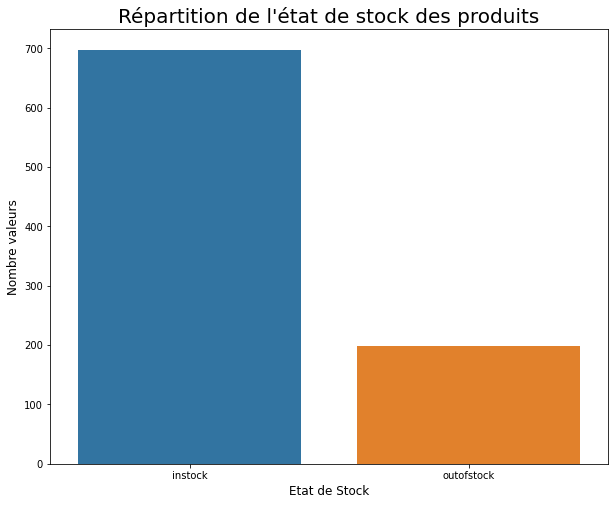

In [23]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser l'état de stock de produits
plot_bar(vin_df, "stock_status")
# Décrire le graphique
describe_graph("Répartition de l'état de stock des produits",
               "Etat de Stock",
               "Nombre valeurs");

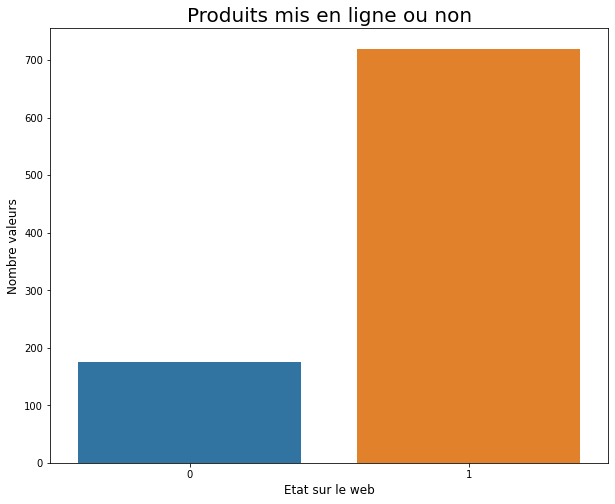

In [24]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser l'état de stock de produits
plot_bar(vin_df, "onsale_web")
# Décrire le graphique
describe_graph("Produits mis en ligne ou non",
               "Etat sur le web",
               "Nombre valeurs");

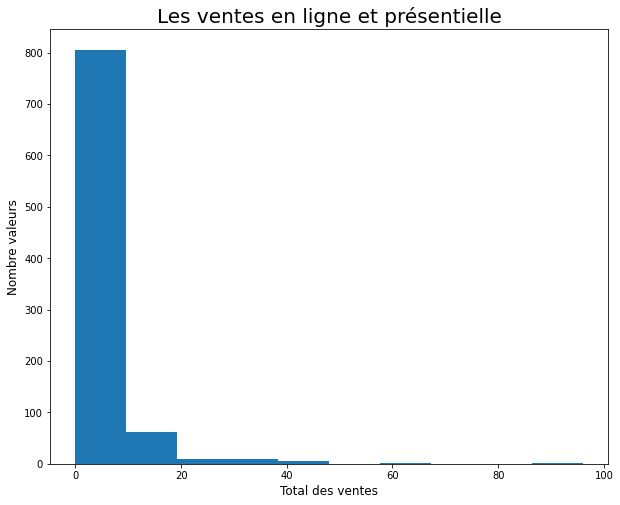

In [25]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser l'état de stock de produits
plot_hist(vin_df, "total_sales", bins=10)
# Décrire le graphique
describe_graph("Les ventes en ligne et présentielle",
               "Total des ventes",
               "Nombre valeurs");

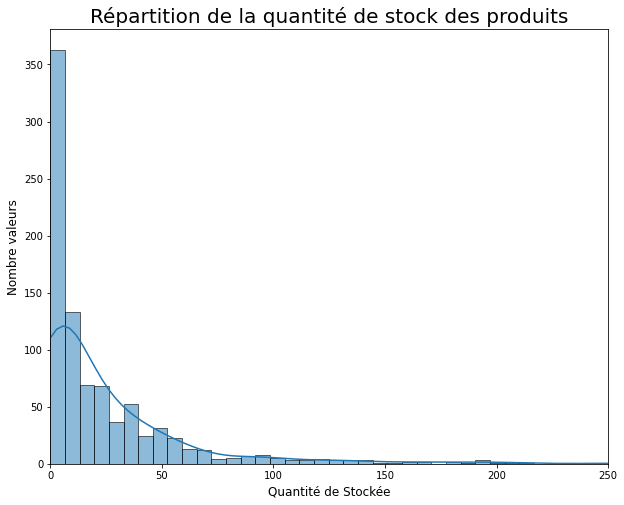

In [26]:
# Définir l'espace de travail
fig(10, 8)
# Visualiser l'état de stock de produits
plot_distribution(vin_df, "stock_quantity")
# Décrire le graphique
describe_graph("Répartition de la quantité de stock des produits",
               "Quantité de Stockée",
               "Nombre valeurs")
# Limiter l'axe des x
plt.xlim([0, 250]);

# 4.2 Analyse Bivariée

Nous allons voir la relation entre les `variables explicatives` (numérique et catégorielle) et la `target` afin d'en tirer des conclusions nécessaires et utiles pour la suivante étape : `modélisation`

- **Relation entre les variables explicatives et la variable cible (`target`)**

In [27]:
# Afficher de nouveau les données
vin_df.head()

,total_sales,onsale_web,price,stock_quantity,stock_status
0,10.0,1,25.0,0,instock
1,6.0,1,24.2,0,outofstock
2,0.0,1,34.3,0,outofstock
3,0.0,1,20.8,0,outofstock
4,3.0,1,14.1,0,outofstock


In [28]:
# Séparer les données en deux catégories (numériques et catégorielle)
num_cols = vin_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = vin_df.select_dtypes(exclude=np.number).columns.tolist()

- Prix selon l'état de stock

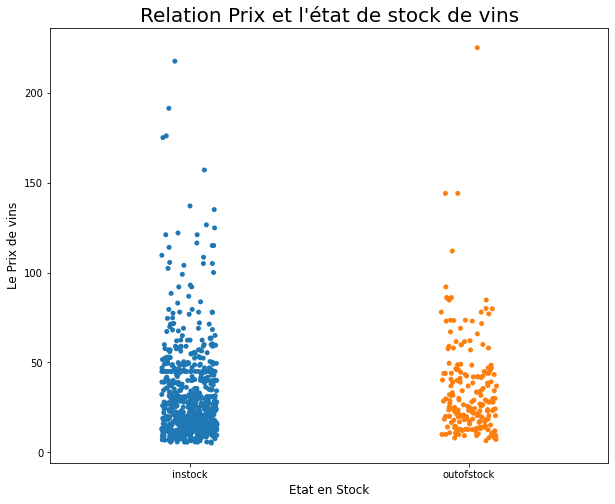

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='stock_status', y='price', data=vin_df, ax=ax)
# Décrire le graphique
describe_graph("Relation Prix et l'état de stock de vins", 
               "Etat en Stock", 
               "Le Prix de vins");

- Prix selon que le produit se trouve en ligne ou non

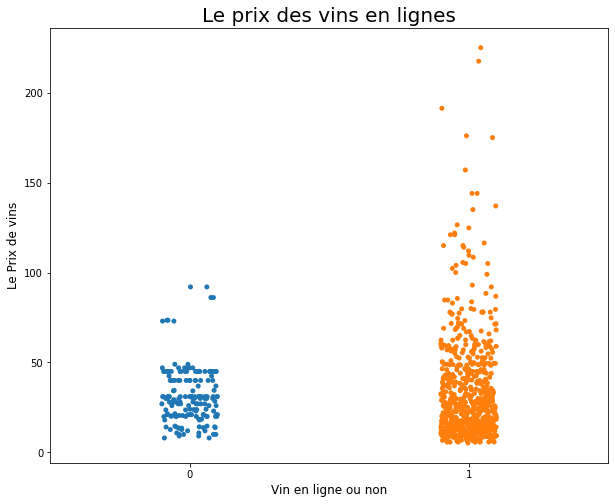

In [30]:
# Visualiser la rélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(x='onsale_web', y='price', data=vin_df, ax=ax)
# Décrire le graphique
describe_graph("Le prix des vins en lignes", 
               "Vin en ligne ou non", 
               "Le Prix de vins");

- **Relation entre variables explicatives**

In [31]:
# Afficher de nouveau les données
vin_df.head()

,total_sales,onsale_web,price,stock_quantity,stock_status
0,10.0,1,25.0,0,instock
1,6.0,1,24.2,0,outofstock
2,0.0,1,34.3,0,outofstock
3,0.0,1,20.8,0,outofstock
4,3.0,1,14.1,0,outofstock


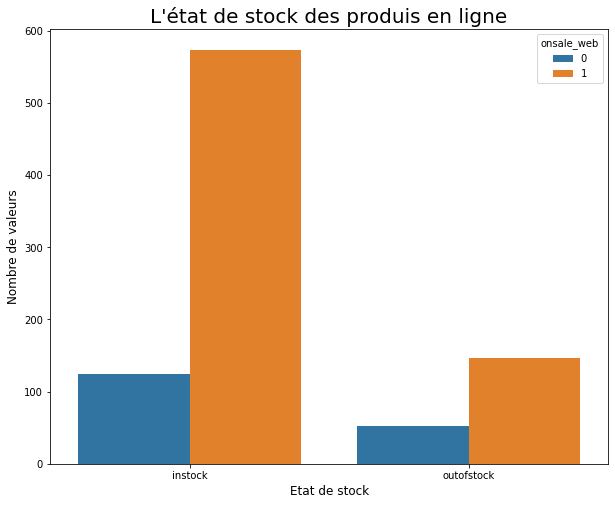

In [32]:
# Déssiner l'espace de travail
plt.figure(figsize=(10, 8))
# Visualiser la relation
plot_bar(vin_df, "stock_status", hue="onsale_web")
# Décrire le graphique
describe_graph("L'état de stock des produis en ligne", 
               "Etat de stock", "Nombre de valeurs");

# 4.3 Analyse Multivariée

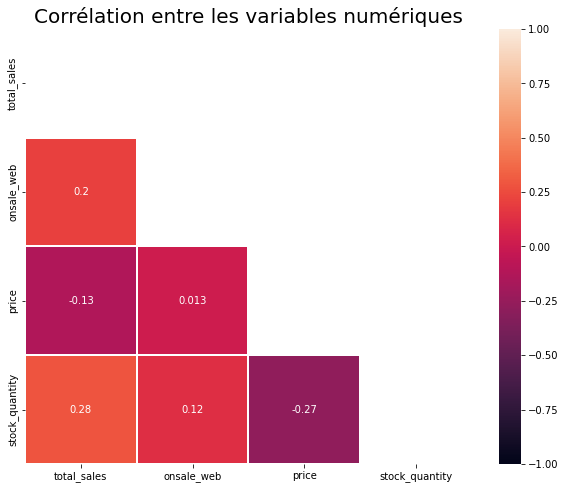

In [33]:
# Calculer la matrice de corrélation sur le jeu de train
person_matrix = vin_df.corr()

# Filtrer sur la matrice triangulaire inférieure
mask = np.triu(np.ones_like(person_matrix))

# Visualiser la matrice de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(person_matrix, vmin=-1, vmax=1, mask=mask,
            annot=True, linewidths=.1, ax=ax)
# Titrer la figure
plt.title("Corrélation entre les variables numériques", fontsize=20);

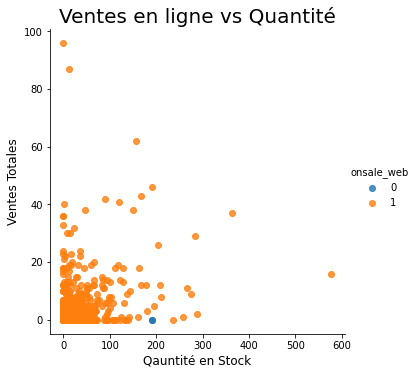

In [34]:
sns.lmplot(data=vin_df, x="stock_quantity", 
           y="total_sales", hue="onsale_web", 
           fit_reg=False)
# Décrire le graphique
describe_graph("Ventes en ligne vs Quantité", 
               "Qauntité en Stock", 
               "Ventes Totales");

- **Sauvegarde des nouvelles données**

In [35]:
vin_df.to_csv("wine_data.csv", index=False)

# 5. Aanalyse Graphique 📈